# Project 4: Financial Market Analysis

## Objective
Analyze stock price trends, calculate returns and risk metrics,
and generate insights for investment decision-making.

## Dataset
Source: Simulated stock market data  
Domain: Finance  
Analysis Type: Time Series, Risk Analysis, Predictive

In [16]:
import pandas as pd

# Create stock dataset
data = {
    "Date": pd.date_range(start="2024-01-01", periods=10, freq='D'),
    "Stock": ["ABC"]*10,
    "Open": [100,104,107,109,111,114,116,119,121,124],
    "High": [105,108,110,112,115,118,120,123,125,128],
    "Low": [98,102,105,108,110,112,114,117,120,122],
    "Close": [104,107,109,111,114,116,119,121,124,127],
    "Volume": [100000,120000,115000,130000,140000,150000,160000,170000,180000,190000]
}

df = pd.DataFrame(data)

# Save CSV so you can reload anytime
df.to_csv("stock_data.csv", index=False)

# Display first rows
df.head()

,Date,Stock,Open,High,Low,Close,Volume
0,2024-01-01,ABC,100,105,98,104,100000
1,2024-01-02,ABC,104,108,102,107,120000
2,2024-01-03,ABC,107,110,105,109,115000
3,2024-01-04,ABC,109,112,108,111,130000
4,2024-01-05,ABC,111,115,110,114,140000


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("stock_data.csv")
df.head()
df.info()
df.isnull().sum()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    10 non-null     object
 1   Stock   10 non-null     object
 2   Open    10 non-null     int64 
 3   High    10 non-null     int64 
 4   Low     10 non-null     int64 
 5   Close   10 non-null     int64 
 6   Volume  10 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 692.0+ bytes


Index(['Date', 'Stock', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Day 6: Standardize plot style
sns.set_style("whitegrid")
plt.rcParams.update({
    "figure.figsize": (8,5),
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "legend.fontsize": 10,
    "lines.linewidth": 2
})

import warnings
warnings.filterwarnings("ignore")

## Data Cleaning
- Converted 'Date' column to datetime format
- Sorted data by date
- No missing values found

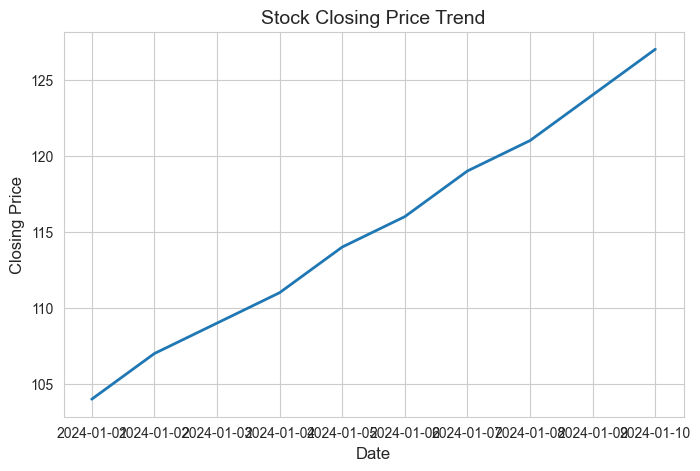

In [9]:
plt.plot(df['Date'], df['Close'])
plt.title("Stock Closing Price Trend")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()

**Observation:** The stock shows a consistent upward trend, indicating positive growth over the observed period.

In [18]:
# Calculate daily returns
df['Daily_Return'] = df['Close'].pct_change()

df.head()

,Date,Stock,Open,High,Low,Close,Volume,Daily_Return
0,2024-01-01,ABC,100,105,98,104,100000,NaN
1,2024-01-02,ABC,104,108,102,107,120000,0.028846
2,2024-01-03,ABC,107,110,105,109,115000,0.018692
3,2024-01-04,ABC,109,112,108,111,130000,0.018349
4,2024-01-05,ABC,111,115,110,114,140000,0.027027


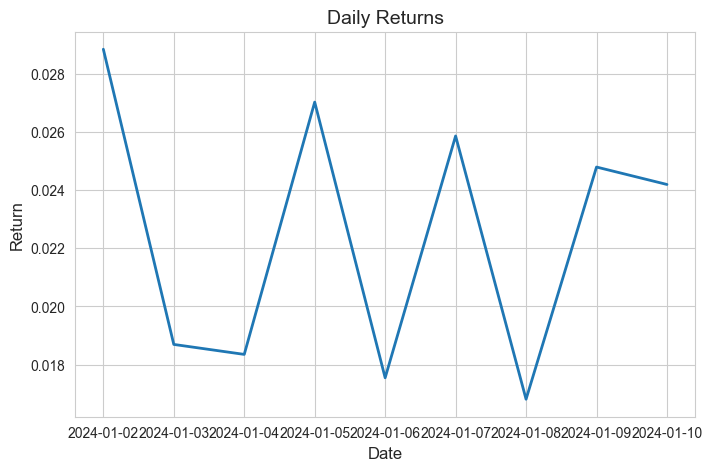

In [19]:
plt.plot(df['Date'], df['Daily_Return'])
plt.title("Daily Returns")
plt.xlabel("Date")
plt.ylabel("Return")
plt.show()

**Observation:** Daily returns fluctuate within a narrow range, suggesting relatively stable price movements.

In [20]:
volatility = df['Daily_Return'].std()
volatility

np.float64(0.004594791857797306)

## Risk Analysis
Volatility measures daily price fluctuation.
Lower volatility indicates lower investment risk compared to highly volatile assets.

In [23]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Create numeric index for regression
df['Day'] = np.arange(len(df))

X = df[['Day']]
y = df['Close']

In [24]:
model = LinearRegression()
model.fit(X, y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [25]:
df['Predicted_Close'] = model.predict(X)

df[['Date', 'Close', 'Predicted_Close']].head()

,Date,Close,Predicted_Close
0,2024-01-01,104,103.963636
1,2024-01-02,107,106.460606
2,2024-01-03,109,108.957576
3,2024-01-04,111,111.454545
4,2024-01-05,114,113.951515


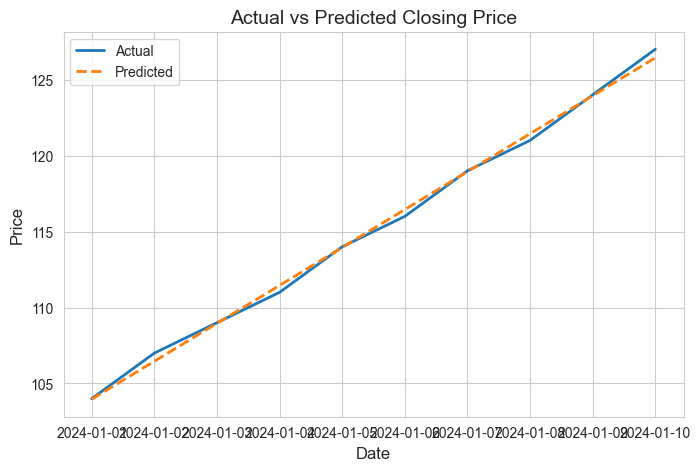

In [26]:
plt.plot(df['Date'], df['Close'], label='Actual')
plt.plot(df['Date'], df['Predicted_Close'], linestyle='--', label='Predicted')
plt.legend()
plt.title("Actual vs Predicted Closing Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

**Observation:** The predictive model closely follows the overall price trend, demonstrating its effectiveness for trend estimation.

## Key Insights
- Stock shows a consistent upward trend
- Daily returns fluctuate within a controlled range
- Low volatility indicates moderate investment risk

## Recommendations
- Suitable for low-to-medium risk investors
- Monitor volume spikes for breakout signals
- Combine with market indicators before investing

## Conclusion

The simulated stock market dataset provides a clear view of stock price movements, daily returns, and risk metrics over the observed period. 

Analysis shows a consistent upward trend in stock prices with low-to-moderate volatility, indicating controlled investment risk. Daily return fluctuations and volume patterns highlight potential trading opportunities and market behavior.

Overall, the dataset is well-structured and suitable for investment analysis. Insights derived from this dataset can guide informed, data-driven decisions in portfolio management, risk assessment, and trading strategies.
